# Demo 2: Subsample

In [1]:
%matplotlib inline

# Import OceanSpy
import oceanspy as ospy

# Additional packages
import matplotlib.pyplot as plt
import numpy             as np

# Import OceanDataset
od = ospy.open_oceandataset.get_started().set_name('Original domain', overwrite=True)

Opening [Getting Started with OceanSpy]:
[A small cutout from EGshelfIIseas2km_ASR.].


/home/idies/miniconda3/lib/python3.7/site-packages/dask/array/blockwise.py:204: UserWarning: The da.atop function has moved to da.blockwise
  warnings.warn("The da.atop function has moved to da.blockwise")


### Arakawa C grid

In [2]:
# Print grid
print(od.grid)
print()
print(od.dataset.coords)

<xgcm.Grid>
time Axis (not periodic):
  * center   time_midp (39) --> outer
  * outer    time (40) --> center
Z Axis (not periodic):
  * center   Z (139) --> left
  * left     Zl (139) --> center
  * outer    Zp1 (140) --> center
  * right    Zu (139) --> center
Y Axis (not periodic):
  * center   Y (262) --> outer
  * outer    Yp1 (263) --> center
X Axis (not periodic):
  * center   X (341) --> outer
  * outer    Xp1 (342) --> center

Coordinates:
  * Z          (Z) float64 -1.0 -3.5 -7.0 ... -1.956e+03 -1.972e+03 -1.986e+03
  * Zp1        (Zp1) float64 0.0 -2.0 -5.0 ... -1.964e+03 -1.979e+03 -1.994e+03
  * Zu         (Zu) float64 -2.0 -5.0 -9.0 ... -1.964e+03 -1.979e+03 -1.994e+03
  * Zl         (Zl) float64 0.0 -2.0 -5.0 ... -1.949e+03 -1.964e+03 -1.979e+03
  * X          (X) float64 -29.98 -29.94 -29.89 -29.85 ... -15.12 -15.07 -15.03
  * Y          (Y) float64 66.01 66.03 66.05 66.07 ... 70.93 70.95 70.97 70.99
    XC         (Y, X) float64 dask.array<shape=(262, 341), chunksize=(

/home/idies/miniconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


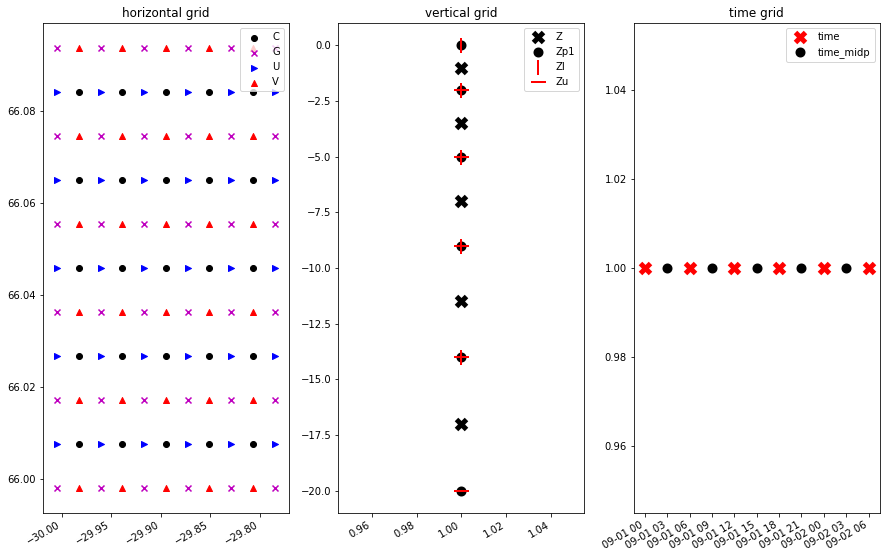

In [3]:
# Plot grid
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,10))
fig.autofmt_xdate()
n_point = 5

# Horizontal dimension
ax1.scatter(od.dataset['XC'].isel(X  =slice(n_point),   Y=slice(n_point)), 
            od.dataset['YC'].isel(X  =slice(n_point),   Y=slice(n_point)),     c='k', marker='o', label='C')
ax1.scatter(od.dataset['XG'].isel(Xp1=slice(n_point+1), Yp1=slice(n_point+1)), 
            od.dataset['YG'].isel(Xp1=slice(n_point+1), Yp1=slice(n_point+1)), c='m', marker='x', label='G')
ax1.scatter(od.dataset['XU'].isel(Xp1=slice(n_point+1), Y=slice(n_point)), 
            od.dataset['YU'].isel(Xp1=slice(n_point+1), Y=slice(n_point)),     c='b', marker='>', label='U')
ax1.scatter(od.dataset['XV'].isel(X  =slice(n_point),   Yp1=slice(n_point+1)), 
            od.dataset['YV'].isel(X  =slice(n_point),   Yp1=slice(n_point+1)), c='r', marker='^', label='V')
ax1.set_title('horizontal grid')
_ = ax1.legend()

# Vertical dimension
ax2.plot(np.ones(n_point)  , od.dataset['Z'].isel(Z=slice(n_point)).values      , 'kx', ms=10, mew=5, label='Z')
ax2.plot(np.ones(n_point+1), od.dataset['Zp1'].isel(Zp1=slice(n_point+1)).values, 'k.', ms=10, mew=5, label='Zp1')
ax2.plot(np.ones(n_point)  , od.dataset['Zl'].isel(Zl=slice(n_point)).values    , 'r|', ms=15, mew=2, label='Zl')
ax2.plot(np.ones(n_point)  , od.dataset['Zu'].isel(Zu=slice(n_point)).values    , 'r_', ms=15, mew=2, label='Zu')
ax2.set_title('vertical grid')
_ =  ax2.legend()

# Time dimension
ax3.plot_date(od.dataset['time'].isel(time=slice(n_point+1)).values        , np.ones(n_point+1),  'rx', ms=10, mew=5, label='time')
ax3.plot_date(od.dataset['time_midp'].isel(time_midp=slice(n_point)).values, np.ones(n_point)  ,  'k.', ms=10, mew=5, label='time_midp')
ax3.set_title('time grid')
_ = ax3.legend()

### Original domain

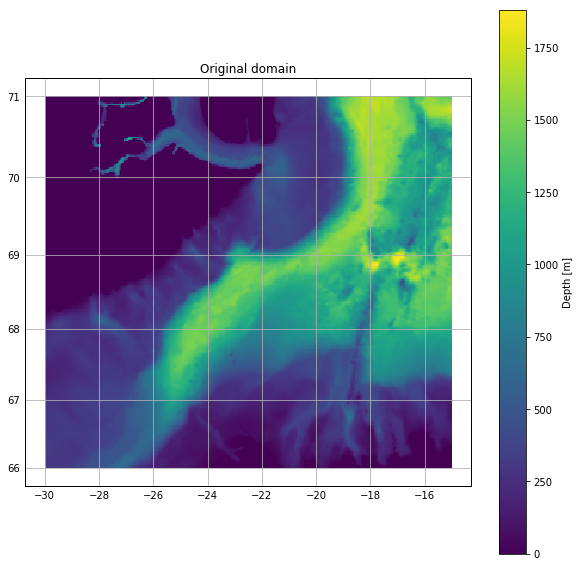

In [4]:
# Plot map
fig=plt.figure(figsize=(10, 10))
ax = od.plot.horizontal_section(varName='Depth')
_  = ax.set_title(od.name)

## Cutout

### Preserving native grid

Cutting out the oceandataset.

<xgcm.Grid>
time Axis (not periodic):
  * center   time_midp (1) --> outer
  * outer    time (2) --> center
Z Axis (not periodic):
  * center   Z (1) --> left
  * left     Zl (1) --> center
  * outer    Zp1 (2) --> center
  * right    Zu (1) --> center
Y Axis (not periodic):
  * center   Y (52) --> outer
  * outer    Yp1 (53) --> center
X Axis (not periodic):
  * center   X (136) --> outer
  * outer    Xp1 (137) --> center

Coordinates:
  * Z          (Z) float64 -1.0
  * Zp1        (Zp1) float64 0.0 -2.0
  * Zu         (Zu) float64 -2.0
  * Zl         (Zl) float64 0.0
  * X          (X) float64 -25.98 -25.94 -25.89 -25.85 ... -20.13 -20.09 -20.04
  * Y          (Y) float64 68.01 68.03 68.05 68.07 ... 68.93 68.95 68.97 68.99
    XC         (Y, X) float64 dask.array<shape=(52, 136), chunksize=(52, 136)>
    YC         (Y, X) float64 dask.array<shape=(52, 136), chunksize=(52, 136)>
  * Xp1        (Xp1) float64 -26.0 -25.96 -25.91 -25.87 ... -20.11 -20.07 -2

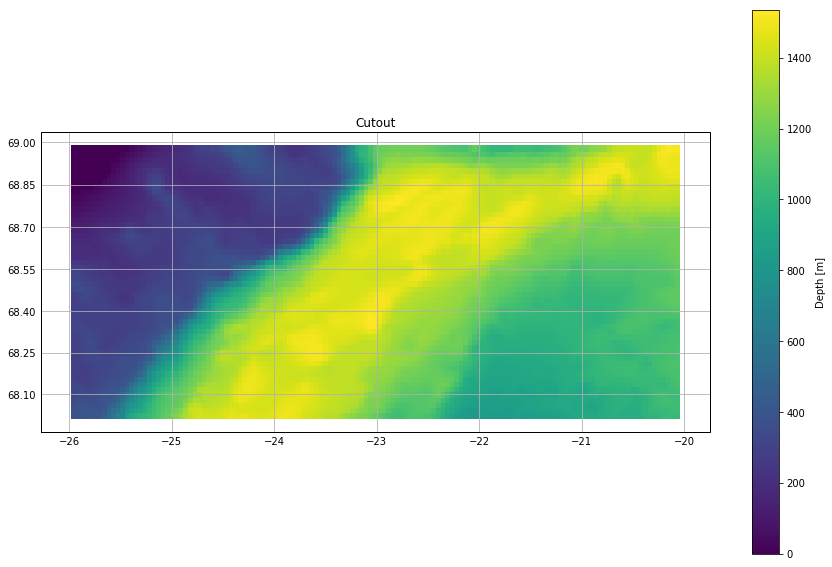

In [5]:
# Cut oceandataset
cut_od = od.subsample.cutout(XRange=[-26, -20], 
                             YRange=[68, 69], 
                             ZRange=0, 
                             timeRange=['2007-09-01']).set_name('Cutout', overwrite=True)

# Print grid
print()
print(cut_od.grid)
print()
print(cut_od.dataset.coords)

# Plot map
fig=plt.figure(figsize=(15, 10))
ax = cut_od.plot.horizontal_section(varName='Depth')
_  = ax.set_title(cut_od.name)

### Dropping axes

In [6]:
drop_od = cut_od.subsample.cutout(ZRange=0, 
                                  timeRange='2007-09-01', 
                                  dropAxes=['time']) # Set dropAxes=True to drop Z as well

# Print grid
print()
print(drop_od.grid)
print()
print(drop_od.dataset.coords)

Cutting out the oceandataset.

<xgcm.Grid>
Z Axis (not periodic):
  * center   Z (1) --> left
  * left     Zl (1) --> center
  * outer    Zp1 (2) --> center
  * right    Zu (1) --> center
Y Axis (not periodic):
  * center   Y (52) --> outer
  * outer    Yp1 (53) --> center
X Axis (not periodic):
  * center   X (136) --> outer
  * outer    Xp1 (137) --> center

Coordinates:
  * Z          (Z) float64 -1.0
  * Zp1        (Zp1) float64 0.0 -2.0
  * Zu         (Zu) float64 -2.0
  * Zl         (Zl) float64 0.0
  * X          (X) float64 -25.98 -25.94 -25.89 -25.85 ... -20.13 -20.09 -20.04
  * Y          (Y) float64 68.01 68.03 68.05 68.07 ... 68.93 68.95 68.97 68.99
    XC         (Y, X) float64 dask.array<shape=(52, 136), chunksize=(52, 136)>
    YC         (Y, X) float64 dask.array<shape=(52, 136), chunksize=(52, 136)>
  * Xp1        (Xp1) float64 -26.0 -25.96 -25.91 -25.87 ... -20.11 -20.07 -20.02
    XU         (Y, Xp1) float64 dask.array<shape=(52, 137), chunksize=(52, 137)>
    YU    

## Vertical sections:

### Preserving native grid: Mooring Array

<img src="./Figs/Kogur.png" width="600">

[Kögur mooring array](http://kogur.whoi.edu/php/index.php)

Cutting out the oceandataset.
Computing potential density anomaly using the following parameters: {'eq_state': 'jmd95'}.
Extracting mooring array.

<xgcm.Grid>
Z Axis (not periodic):
  * center   Z (139) --> left
  * left     Zl (139) --> center
  * outer    Zp1 (140) --> center
  * right    Zu (139) --> center
mooring Axis (not periodic):
  * center   mooring_midp (190) --> outer
  * outer    mooring (191) --> center
Y Axis (not periodic):
  * center   Y (1) --> outer
  * outer    Yp1 (2) --> center
X Axis (not periodic):
  * center   X (1) --> outer
  * outer    Xp1 (2) --> center

Coordinates:
  * mooring_midp       (mooring_midp) float64 0.5 1.5 2.5 ... 187.5 188.5 189.5
  * mooring            (mooring) int64 0 1 2 3 4 5 6 ... 185 186 187 188 189 190
  * Y                  (Y) int64 0
  * Yp1                (Yp1) int64 0 1
  * X                  (X) int64 0
  * Xp1                (Xp1) int64 0 1
  * Z                  (Z) float64 -1.0 -3.5 -7.0 ... -1.972e+03 -1.986e+03
  * time   

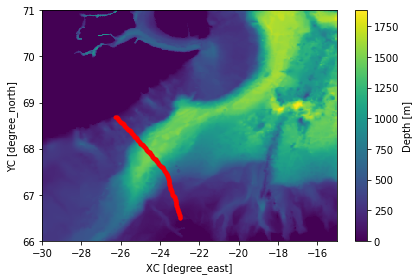

In [7]:
# Extract Kogur mooring array
lats_Kogur = [ 68.68,  67.52,  66.49]
lons_Kogur = [-26.28, -23.77, -22.99]
od_Kogur = od.subsample.mooring_array(Xmoor=lons_Kogur, 
                                      Ymoor=lats_Kogur, 
                                      timeRange='2007-09-01',
                                      dropAxes=True,
                                      varList=['Sigma0', 'U', 'V', 'momVort3'])
od_Kogur = od_Kogur.set_name('Mooring array', overwrite=True)

# Print grid
print()
print(od_Kogur.grid)
print()
print(od_Kogur.dataset.coords)
print()

# Plot map
ax = ospy.plot.horizontal_section(od.set_projection(None), varName='Depth')
_ = ax.plot(od_Kogur.dataset['XC'].squeeze(), od_Kogur.dataset['YC'].squeeze(), 'r.')

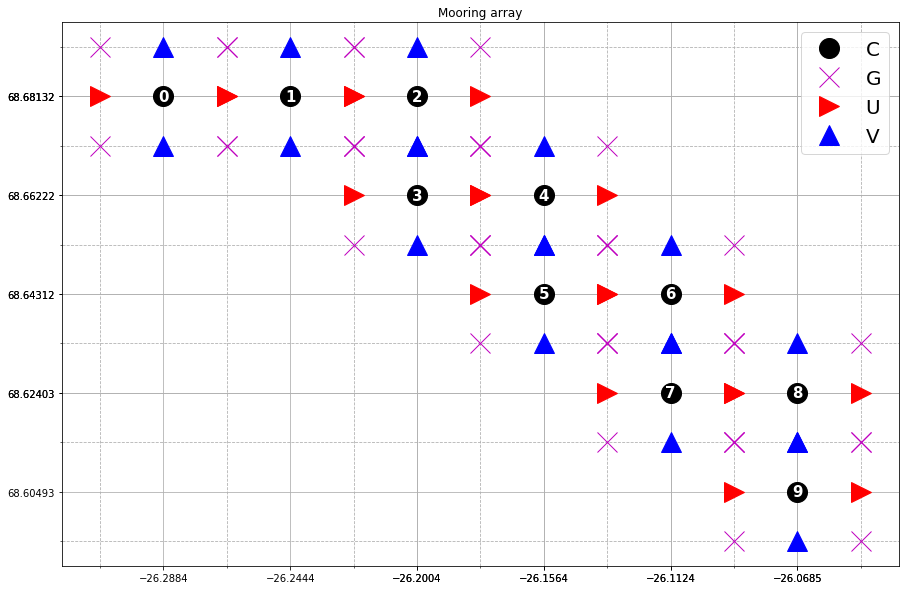

In [8]:
# Plot grid
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
n_moorings = 10
for i, (pos, mark, col) in enumerate(zip(['C', 'G', 'U', 'V'],
                                         ['o', 'x', '>', '^'],
                                         ['k', 'm', 'r', 'b'])):
    ax.plot(od_Kogur.dataset['X'+pos].isel(mooring=slice(n_moorings)).values.flatten(), 
            od_Kogur.dataset['Y'+pos].isel(mooring=slice(n_moorings)).values.flatten(), col+mark,
            markersize = 20, label=pos)

for i in range(n_moorings):
    ax.annotate(str(i), (od_Kogur.dataset['XC'].isel(mooring=i).squeeze(),
                         od_Kogur.dataset['YC'].isel(mooring=i).squeeze()), 
                size=15, weight="bold", color='w', ha='center', va='center')
ax.legend(prop={'size': 20})
ax.set_xticks(od_Kogur.dataset['XC'].isel(mooring=slice(n_moorings)).squeeze(), minor=False)
ax.set_yticks(od_Kogur.dataset['YC'].isel(mooring=slice(n_moorings)).squeeze(), minor=False)
ax.set_xticks(np.unique(od_Kogur.dataset['XG'].isel(mooring=slice(n_moorings)).squeeze()), minor=True)
ax.set_yticks(np.unique(od_Kogur.dataset['YG'].isel(mooring=slice(n_moorings)).squeeze()), minor=True)
ax.grid(which='major', linestyle='-')
ax.grid(which='minor', linestyle='--')
_ = ax.set_title(od_Kogur.name)

Regridding [V] along [Y]-axis.


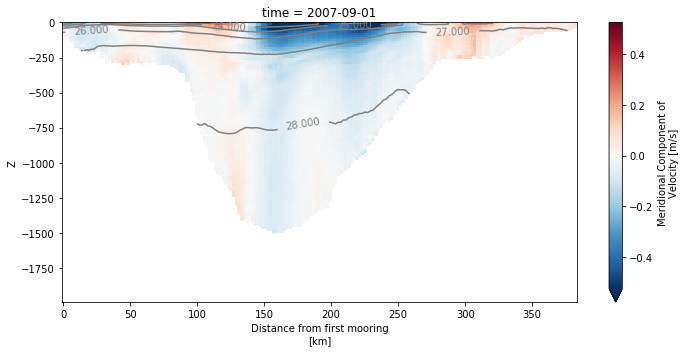

In [9]:
# Plot vertical section
fig=plt.figure(figsize=(10, 5))
_ = od_Kogur.plot.vertical_section(varName='V', contourName='Sigma0', robust=True)

### Dropping Axes: Survey Stations

<img src="./Figs/survey.jpg" width="600">

[Ship Survey](https://www.brighthubengineering.com/naval-architecture/30631-how-many-types-of-research-ships-are-used-for-scientific-studies/)

Cutting out the oceandataset.
Computing potential density anomaly using the following parameters: {'eq_state': 'jmd95'}.
Carrying out survey.
Create weight file: bilinear_118x76_142x142.nc


/home/idies/miniconda3/lib/python3.7/site-packages/xesmf/backend.py:36: UserWarning: Input array is not F_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not F_CONTIGUOUS. "


Variables to interpolate: ['XC', 'YC', 'XU', 'YU', 'XV', 'YV', 'XG', 'YG', 'U', 'V', 'momVort3', 'Sigma0'].
Interpolating [XC].
Interpolating [YC].
Interpolating [XU].
Interpolating [YU].
Interpolating [XV].
Interpolating [YV].
Interpolating [XG].
Interpolating [YG].
Interpolating [U].


/home/idies/miniconda3/lib/python3.7/site-packages/xesmf/smm.py:73: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


Interpolating [V].
Interpolating [momVort3].
Interpolating [Sigma0].
Remove file bilinear_118x76_142x142.nc

<xgcm.Grid>
Z Axis (not periodic):
  * center   Z (139) --> left
  * left     Zl (139) --> center
  * outer    Zp1 (140) --> center
  * right    Zu (139) --> center
station Axis (not periodic):
  * center   station_midp (141) --> outer
  * outer    station (142) --> center

Coordinates:
  * station_midp       (station_midp) float64 0.5 1.5 2.5 ... 138.5 139.5 140.5
  * station            (station) int64 0 1 2 3 4 5 6 ... 136 137 138 139 140 141
    lat                (station) float64 68.68 68.67 68.65 ... 66.52 66.51 66.49
    lon                (station) float64 -26.28 -26.25 -26.22 ... -23.0 -22.99
  * Z                  (Z) float64 -1.0 -3.5 -7.0 ... -1.972e+03 -1.986e+03
  * time               (time) datetime64[ns] 2007-09-01
  * Zp1                (Zp1) float64 0.0 -2.0 -5.0 ... -1.979e+03 -1.994e+03
  * Zu                 (Zu) float64 -2.0 -5.0 -9.0 ... -1.979e+03 -1.994e

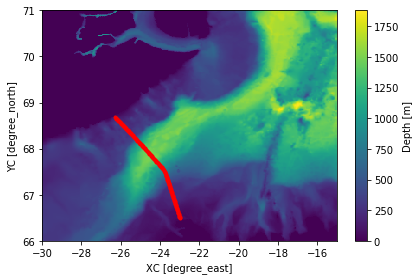

In [10]:
# Conduct a survey overlapping the mooring array
od_surv = od.subsample.survey_stations(Xsurv=lons_Kogur, 
                                       Ysurv=lats_Kogur, 
                                       timeRange='2007-09-01',
                                       delta=2, # km
                                       dropAxes=True,
                                       varList=['Sigma0', 'U', 'V', 'momVort3'])
od_surv = od_surv.set_name('Ship survey', overwrite=True)

# Print grid
print()
print(od_surv.grid)
print()
print(od_surv.dataset.coords)
print()

# Plot map
ax = ospy.plot.horizontal_section(od.set_projection(None), varName='Depth')
_  = ax.plot(od_surv.dataset['XC'].squeeze(), od_surv.dataset['YC'].squeeze(), 'r.')

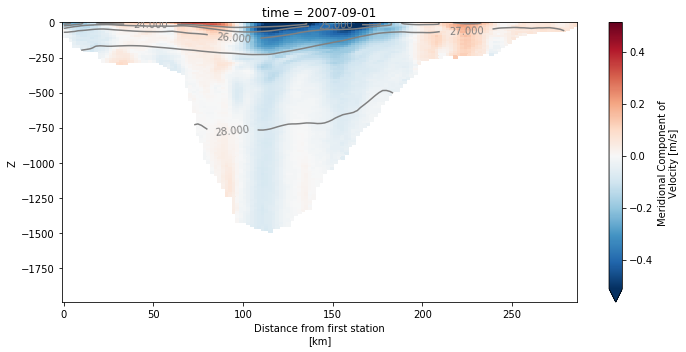

In [11]:
# Plot vertical section
fig=plt.figure(figsize=(10, 5))
_ = od_surv.plot.vertical_section(varName='V', contourName='Sigma0', robust=True)

### Comparison

Regridding [V] along [Y]-axis.


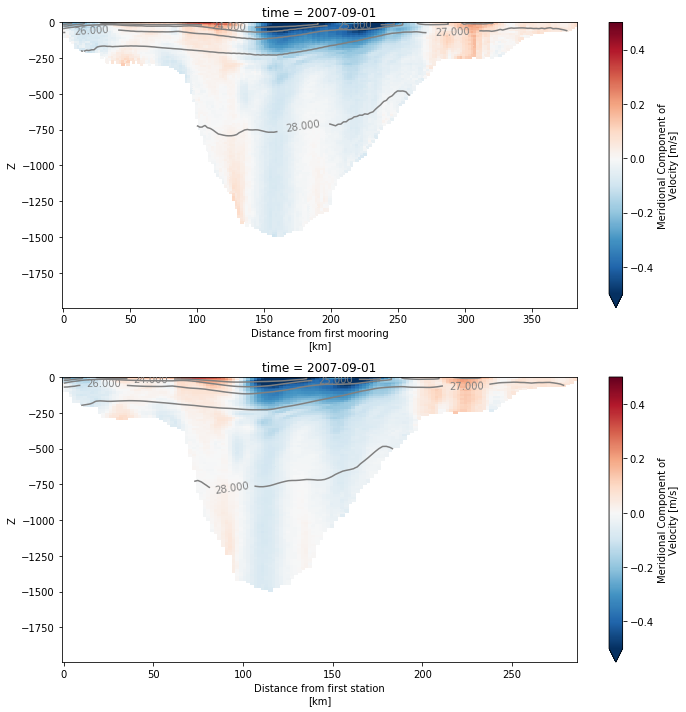

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
for i, (ax, this_od) in enumerate(zip(axes, [od_Kogur, od_surv])):
    _ = this_od.plot.vertical_section(varName='V', contourName='Sigma0', ax=ax, vmax=0.5)

## Particle properties
[Our lagrangian particle code](https://vimeo.com/296949375)

In [13]:
# Extract a cutout without land
cut_od = od.subsample.cutout(XRange=[-26, -20], 
                             YRange=[68, 69], 
                             ZRange=0).set_name('CUT', overwrite=False)
# Create 10 random paths
times   = cut_od.dataset['time']
n_parts = 10
Ypart = np.empty((len(times), n_parts)) 
Xpart = np.empty((len(times), n_parts)) 
Zpart = np.zeros((len(times), n_parts)) 
for p in range(n_parts):
    Ypart[:, p]= np.random.choice(cut_od.dataset['Y'], len(times))
    Xpart[:, p]= np.random.choice(cut_od.dataset['X'], len(times))

# Extract particles
parts_od = cut_od.subsample.particle_properties(times=times, Ypart=Ypart, Xpart=Xpart, Zpart=Zpart, varList='Sigma0')

Cutting out the oceandataset.
Cutting out the oceandataset.
Computing potential density anomaly using the following parameters: {'eq_state': 'jmd95'}.
Extracting Eulerian properties of particles.


/home/idies/workspace/Storage/malmans2/persistent/ESIP/oceanspy/oceanspy/subsample.py:1136: UserWarning: 
Particle properties extraction drops variables on `time_midp` dimension. 
Dropped variables: ['time_midp'].
  return particle_properties(self._od, **kwargs)


In [14]:
# Print grid
print(parts_od.grid)
print()
print(parts_od.dataset.coords)

<xgcm.Grid>
time Axis (not periodic):
  * center   time_midp (39) --> outer
  * outer    time (40) --> center

Coordinates:
  * particle   (particle) int64 0 1 2 3 4 5 6 7 8 9
  * time       (time) datetime64[ns] 2007-09-01 ... 2007-09-10T18:00:00
    Z          (time, particle) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0
    Zl         (time, particle) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Zp1        (time, particle) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Zu         (time, particle) float64 -2.0 -2.0 -2.0 -2.0 ... -2.0 -2.0 -2.0
    X          (time, particle) float64 -25.1 -25.41 -25.98 ... -25.94 -22.77
    Y          (time, particle) float64 68.24 68.62 68.59 ... 68.24 68.41 68.11
    XC         (time, particle) float64 dask.array<shape=(40, 10), chunksize=(40, 10)>
    YC         (time, particle) float64 dask.array<shape=(40, 10), chunksize=(40, 10)>
  * time_midp  (time_midp) datetime64[ns] 2007-09-01T03:00:00 ... 2007-09-10T15:00:00


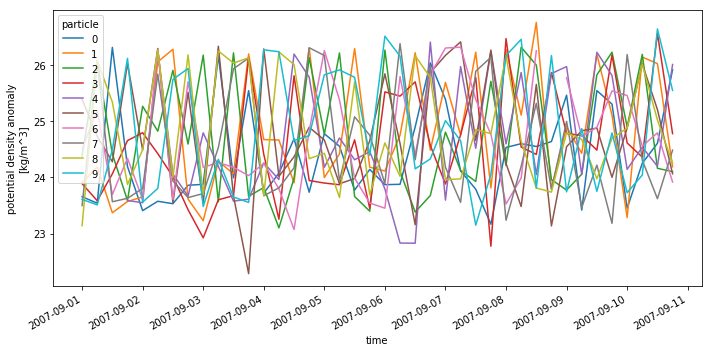

In [15]:
# Plot
fig=plt.figure(figsize=(10, 5))
_ = parts_od.plot.time_series(varName='Sigma0')

To do:  

* Add remote sensing function

* Migrate MATLAB particle code
